<a href="https://colab.research.google.com/github/comaraDOTcom/ml-applications/blob/main/Week5/ET5003_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [1]:
#@title Current Date
Today = '2021-10-16' #@param {type:"date"}


In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "Team 5" #@param {type:"string"}
Student_ID_Name = "9312951 Mike Scally" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
Student_ID_Name = "" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = "Final" #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# INTRODUCTION

###Problem Description

In this Etivity, we will build a supervised machine learning model combined with Natural Language Processing (NLP) to predict house prices. We will use data from the house prices dataset to train our model. We will use NLP as a starting point to identify new features to add to our training features from the text description fields in our dataset. We will use a linear regression, piecewise regression and Bayesian Neural Network to predict the relationship between our inpt variables for house properties and output house prices. We will split our training data into train and validation sub-datasets. We will compare the predicted house prices from the validation set against their true values to evaluate the results. These differences between observed and true values are known as residuals (Bock, 2021). Finally, we will predict the house prices for the test dataset, we do not have any true values for these, but the results will be uploaded to Kaggle as part of a competition.

We initially load the data and perform EDA to understand the composition of the data, the makeup of the different house properties, look for missing data etc. Once we have cleanesed the data, we use NLP on the features column of our dataset to try and determine new features to add to our input features to improve the model predictions. Using existing and new features, we build a baseline Bayesian multinomial regression model that treats all the data as one and builds a model to predict house prices based on this one model.

We then take a Piecewise regression approach to solving the same problem. Piecewise regression, also known as Segmented Regression is an approach where we break the data into multiple segments, and then apply linear regression seperately on each of the segments. Piecewise regression is useful when data once clustered into individual groups, the independent variables in each of the groups exhibits different relationships between each other. The boundaries between different segments in piecewise regression are called breakpoints (Segmented regression - Wikipedia, 2021)

Piecewise regression is a variation of linear regression and can be used when a single line is not sufficient to model the entire dataset. In such cases, the data is split into multiple different clusters, and an individual line/model can be fit to each cluster to better represent the data (Kappel, 2017).Your introduction here.

Finally, we will train a Bayesian Neural Network model on our data to predict house prices for our test dataset. Bayesian Neural Networks are a form of artificial neural network trained using Bayesian inference. A BNN is made up of an input layer (in our case house price training data), one or more hidden layers and an output layer (predicted house price in our case). Each layer contains a number of nodes, and is made up of weights and biases. When we utilise BNN for predicted output values, we are interested in finding the marginal probability distribution. One advantage of the Bayesian Neural Networks over other ANN approaches is we can quantify the uncertainty of the network (Jospin et al., 2021)

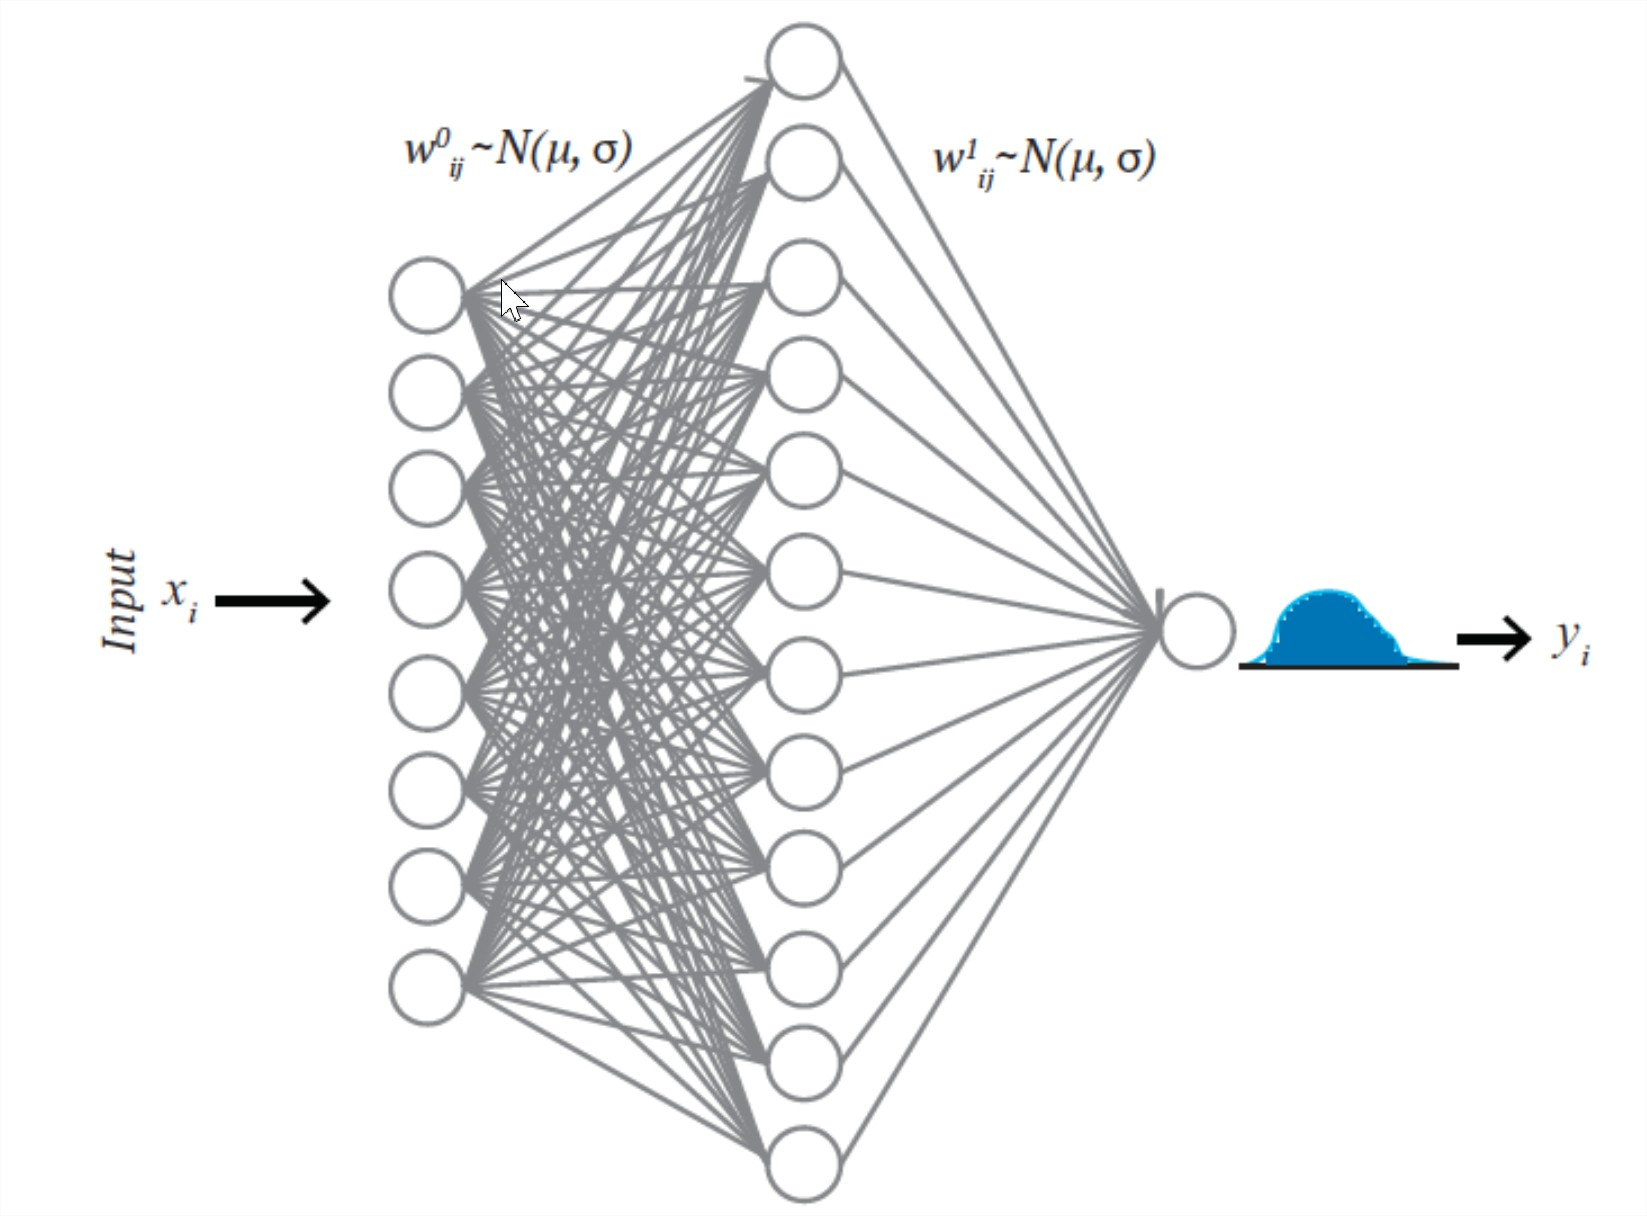

The above diagram (Ahamed, 2019) shows a typical Bayesian Neural Network, with eight inputs (properties of houses in our implementation), one hidden layer with twelve nodes, and an output layer which would be the prediction of the house price. IN a BNN, the weights are considered as a probability distribution.The final weights for the network are calculated using Bayes Theorem.

The final step is to upload our test data predictions to Kaggle as part of a competition to evaluate our model output.

###Dataset

We are using the House Price Dataset for this Etivity. The dataset can be downloaded from [here](https://www.kaggle.com/c/ul-et5003-sem1-2021-2/data)

The dataset contains a list of houses and a list of attributes for each of the houses. The Training data also has the true price value for the listed properties. We will use this trianing data to train and validate our model, and then we will test our model on the test data. The test data does not come with the true price of the house, so we split our training data into test and validation datasets in order to validate our model. We compare the output of the model on the validation data and compare this to the true prices of the same validation data to check the residuals

Here is a sample of the training dataset:
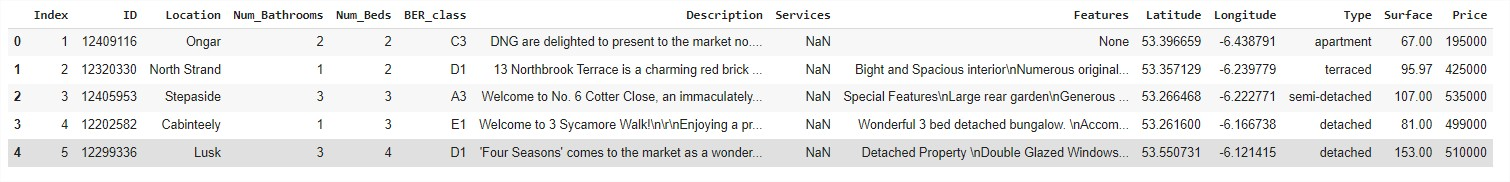

Following is a list of features of the dataset:

*   Index - Unique index for each row of training and test dataset
*   ID - A unique identifier for each property, ignore for the purposes of training the model
*   Location - The area the property is located in
*   Num_Bathrooms - Number of bathrooms of the property
*   Num_Beds - Number of bedrooms in the property
*   BER_class - The BER rating of the property. As there were a number of missing values in this feature, we had to infer their value
*   Description - A description of the property
*   Services - What services were available as part of the property
*   Features - This contains a text description of the features of the property. We used this column for NLP to identify new features to use
*   Latitude - Contains the latitude of the property.
*   Longitude - Contains the longitude of the property location
*   Type - Contains the type of property - apartment, detached house etc
*   Surface - Contains the surface area of the property.
*   Price - The target variable for the model, and for the training data is used to train the model

Following the loading of the data, and the exclusion of the fields described above, the following preprocessing was completed on the data:
*   Checked but there zero properties with zero beds/bathrooms
*   Impute missing values for BER class using mean, and encode each of the BER classes
*   Remove outliers from latitude and longitude variables
*   Use NLP on the features column to identify new features to add to the training model 



###Method
The objective of this Etivity is to use a combination of multiple Supervised Learning approaches with NLP to infer new features to add and to predict house prices given a set of input variables for a property. We initially use NLP on one of the columns to determine extra features to be added to improve the model performance. Once we have extracted these new features, we are ready to use machine learning to predict the house prices.

We train two different models on the data. Initially, we build a single model on the full training dataset using linear regression, and determine the Mean Absolute Error (MAE) and the Mean Absolute Percentage Error (MAPE) of the model. We then split the dataset up into multiple clusters, and use piecewise linear regression on each of the clusters individually. Again, we calculate the MAE and MAPE of each of the clusters individually, and we should expect our new cluster models to have a lower error rate than the overall model. The reason for this is each of the clusters is treated individually, and we can fit a better model when each cluster is treated seperately.

Finally, we use a Bayesian Neural Network on the same dataset with extra features to train a new model, and predict the house prices. IN all of our models, we initiaily split our training data in train and validation sets, use the training data to train the model, and use the validation set to verify the model performance. Lastly, we use our test dataset to predict the house prices for the test properties.

After completing the EDA, I created a heatmap of all the features to determine the correlation between each one and the price target variable. From the heatmap we can see that bathrooms, beds, longitude and surface have the nighest correlation with price. 

To try and improve on the model performance, I use NLP to try and infer new features to add to the training model. To do this, we look at the number of occurances of particular words in the text descriptions, and see how these words correlate with the hourse price predictions. We initially do some Preprocessing of the data to remove non-alpha characters from the dataset, remove some short words and make all the text lowercase. We then tokenize the text into words, and remove any stop words from the text. I then use a CountVector to create a matrix of token counts for each word in each of the features. This will produce a sparse representation of the word counts.

This will get a list of IDF weights for each of the words in the features. Ideally from the list, we would complete some further analysis perhaps using XG-Boost  or similar to determine which of the words have a best correlation with the price. However, instead here due to time constraints, I selected 3 features to add that appear in the top list above: garden, parking & heating. We will add these as new features to our model, usig the TF-IDF score for each of the words in each of the features, and train our model on existing house features and also these new features. TF-IDF (Text Frequency-Inverse Document Frequency) gives the ratio of times a particular word appears in a specific text vs the whole document (NLP with Real Estate Advertisements, 2020). Now that we have the TD-IDF score, we can use these scores as extra features in our model. We would expect the NLP features would improve the overall performance of the models. 

We can then build our supervised machine learning models using this new feature set. For the piecewise machine learning approach, we first need to split the data into clusters. A Gaussian Mixture Model is a model used for clustering data. Gaussian Mixture Models are used for splitting data into subpopulations and the advantage of such a model is it does not require which subpopulation the data points belong to. The model will learn the sub-populations themselves (Solanki, 2020). We use a Gaussian Mixture Model to initially determine the number of clusters in the data. A visual inspection of the Gaussian Mixture scatter plot of latitude and longitude of the housing dataset suggests 4/5 clusters. I also used K-Means clustering, which is an unsupervised machine learning approach to cluster the data into K clusters. The elbow method for K-Means clustering runs the data for multiple different k values (centers), and calculates the sum of the distances of the samples to their closest center. From the plot of the number of clusters vs the sum of square errors, the elbow in the plot shows the optimum number of clusters to select. IN our case, the elbow appears at k=4 clusters, and therefore I choose four clusters as the optimum (Elbow Method — Yellowbrick v1.3.post1 documentation, n.d.)

With the number of clusters decided upon, we devide up our housing dataset into the different clusters and using piecewise regression train our Bayesian model on each of the clusters individually. 

We then use the same training dataset and feature set to train a Bayesian Neural Network to predict the house prices of our training dataset. The Bayesian NN can determine the house prices incorporating uncertainty into the model. For the BNN model, we use an input layer, a hidden layer and an output layer. We set initial weights for input to hidden layer, and another set of weights between the hidden layer and the output layer. As before, we draw samples from the posterior to predict the house pirces first on our validation dataset to evaluate the model, and finally on the test dataset. We use activation functions to calculate the output from a weighted some of the inputs for each layer.

We are not suplied with the true values for the test dataset, and this is why we convert our training dataset into both train and validation sub-sets, allowing us to train the model on the training dataset before evaluating the model on the validation dataset. Finally, we predict the house prices on the test dataset as was the goal of the activity.



## Imports

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [6]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [7]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import cluster

In [8]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

In [9]:
!pip install gpy

In [10]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [11]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

We start off by loading the training and test dataset, and have a look at some statistics from the data

## Training & Test Data

### Load the Dataset

In [12]:
#Load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Path, copy the path from your Drive
Path = '/content/drive/My Drive/Masters/ET5003_Enrique/etivity3/house-data/'

training_file = Path + 'HousePrice_Train.csv'
testing_file = Path + 'HousePrice_Test.csv'

# Load training data
dftrain = pd.read_csv(training_file)

# test data
dftest = pd.read_csv(testing_file)

# test prices
#dfcost = pd.read_csv(cost_file)

print("Train Data Shape:", dftrain.shape)
print("Test Data Shape:", dftest.shape)
#print("True Data Shape:", dfcost.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data Shape: (1638, 14)
Test Data Shape: (702, 13)


### Train dataset

In [13]:
# show first data frame rows 
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [14]:
# Generate descriptive statistics
dftrain.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


We can see from the above statistics there are 1638 records in total,with no missing data in the numeric columns

### Test dataset

In [15]:
# show first data frame rows 
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [16]:
# Generate descriptive statistics
dftest.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface
count,702.000000,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,1989.500000,1.231545e+07,2.027066,2.987179,53.350445,-6.252411,132.603530
std,202.794231,1.420680e+05,1.071273,1.198480,0.073961,0.091600,330.347066
min,1639.000000,1.147889e+07,1.000000,1.000000,53.214227,-6.521183,32.100000
25%,1814.250000,1.227637e+07,1.000000,2.000000,53.295225,-6.304258,73.000000
50%,1989.500000,1.237928e+07,2.000000,3.000000,53.341153,-6.247799,99.200000
75%,2164.750000,1.240421e+07,3.000000,4.000000,53.381752,-6.184277,136.875000
max,2340.000000,1.242824e+07,9.000000,14.000000,53.617443,-6.057150,8576.000000


# 3.0 Exploratory Data Analysis and Cleansing

In [17]:
#Count records where bedrooms or bathrooms are zero
print("\nNumber of records with zero beds:", (dftrain['Num_Beds'] == 0).sum())
print("Number of records with zero bathrooms:", (dftrain['Num_Bathrooms'] == 0).sum())

#Check for empty values in columns
print(dftrain.isna().sum())


Number of records with zero beds: 0
Number of records with zero bathrooms: 0
Index               0
ID                  0
Location            0
Num_Bathrooms       0
Num_Beds            0
BER_class         251
Description         0
Services         1061
Features            0
Latitude            0
Longitude           0
Type                0
Surface             0
Price               0
dtype: int64


Based on the above results, there is no zero values in beds or bathrooms, but lots of empty values in BER_class that would need to be addressed to use this column

In [18]:
#A method that can encode any column based on the values that exist in that column
def encode_colummn(df, column):
  unique_values = df[column].unique().astype(str)

  unique_values.sort()

  scale_mapper = {}
  i = 0
  for s in unique_values:
    scale_mapper[s] = i
    i += 1

  return scale_mapper

In [19]:
#Encoding the BER_class
scale_mapper = {}
if dftrain['BER_class'].dtypes != np.int64:
  dftrain.loc[dftrain['BER_class'] == 'SINo666of2006exempt', 'BER_class'] = 'C3'
  dftrain.loc[dftrain['BER_class'].isna(), 'BER_class'] = 'C3'
  scale_mapper = encode_colummn(dftrain, 'BER_class')
  dftrain['BER_class'] =  dftrain['BER_class'].replace(scale_mapper)


#Encoding the BER_class for test data
if dftest['BER_class'].dtypes != np.int64: 
  dftest.loc[dftest['BER_class'] == 'SINo666of2006exempt', 'BER_class'] = 'C3'
  dftest.loc[dftest['BER_class'].isna(), 'BER_class'] = 'C3'
  dftest['BER_class'] =  dftest['BER_class'].replace(scale_mapper)
  

In [20]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,7,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,11,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,14,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,1,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,13,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


We now have imputed mising values in BER class, and used a scaler mapper to map them to numerical values

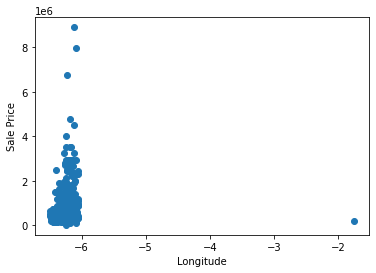

In [21]:
#Lets have a look at longitude values and see if there are outliers
plt.scatter(x=dftrain['Longitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

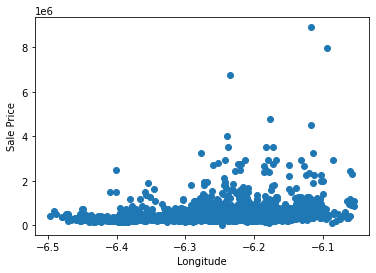

In [22]:
#Remove outliers - where longitude > -4
dftrain = dftrain[dftrain['Longitude'] < -4]
plt.scatter(x=dftrain['Longitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Longitude')
plt.show()

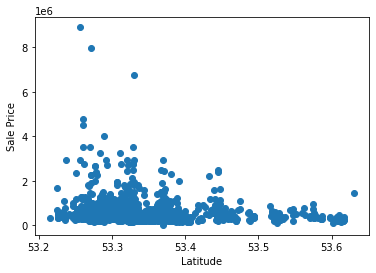

In [23]:
#Lets have a look at the latitude values
plt.scatter(x=dftrain['Latitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Latitude')
plt.show()

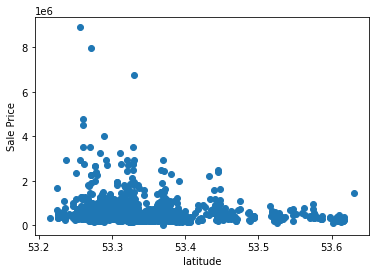

In [24]:
#Remove outliers where latitude < 53
dftrain = dftrain[dftrain['Latitude'] > 53]
plt.scatter(x=dftrain['Latitude'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('latitude')
plt.show()

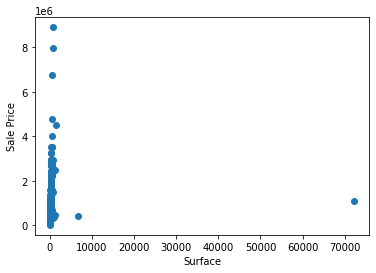

In [25]:
#Lets have a look at the Surface values
plt.scatter(x=dftrain['Surface'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Surface')
plt.show()

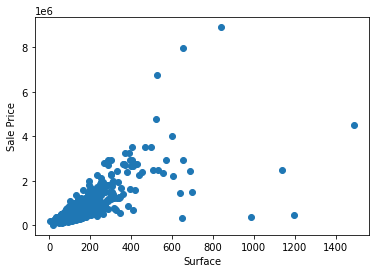

In [26]:
#Remove outliers where surface > 3000
dftrain = dftrain[dftrain['Surface'] < 3000]
plt.scatter(x=dftrain['Surface'], y=dftrain['Price'])
plt.ylabel('Sale Price')
plt.xlabel('Surface')
plt.show()

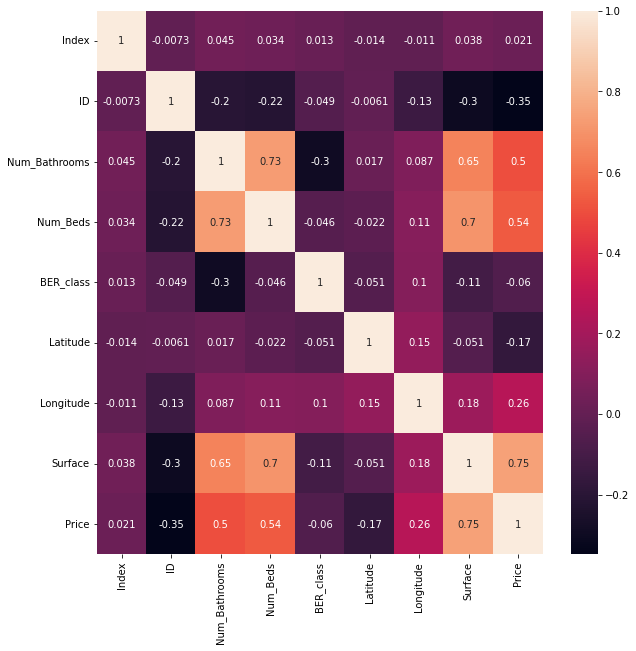

In [27]:
#Look at the correlation between the different features of our data and the house prices. 
plt.figure(figsize=(10, 10))
sns.heatmap(dftrain.corr(), annot=True);

From the correlation matrix above, bathrooms, beds, longitude, surface,  seem to be the best predictors for the price

# 4.0 NATURAL LANGUAGE PROCESSING

We will utilise NLP to extract new features to train our model to compliment some of the features provided in the dataset. We will focus on the "Features" column within the dataset, even though a similar principle could be applied for other text columns. Our goal here is to introduce new features based on the text description features to improve on model peformance. 

The steps to be carried out are as follows:


*   Complete some preprocessing of the data to remove non-alpha characters, remove short words, make all text lower case, tokenisation of the words in each of the features and remove stop words. Given more time we could also utilise lemmatization etc to group similar words
*   Use CountVectorizer and TfidfTransformer to determine the number of occurences of each word and to produce IDF weights for all words. We will use this output to determine the words to include as new features
*   Use TfidfVectorizer to get the TF-IDF scores for each of the chosen words for our training dataset, and use this to infer new features
*   Similarly, get the TF-IDF scores for the same words for our test dataset
*   We add new features to both our training dataset and test dataset for garden, parking and heating and the TF-IDF scores for each of these
*   Our final training features will be as follows: Num_Beds, Num_Bathrooms,Latitude, Longitude, Surface, garden_scores, parking_scores, heating_scores,BER_class

The above is following a similar process as laid out in (NLP with Real Estate Advertisements, 2020) and referenced below.


In [28]:
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

#This function will perform NLP Preprocessing, to cleanup data, remove stop words, small words, convert text to lowercase
#We will utilise the features column to try and add more features to our model using NLP
def NLP_preprocess(input_text):
  new_df = input_text

  #Remove any non-alpha characters
  new_df['clean_features'] = new_df['Features'].str.replace("[^a-zA-Z#]", " ")

  # removing short words
  short_word = 4
  new_df['clean_features'] = new_df['clean_features'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>short_word]))

  # make all text lowercase
  new_df['clean_features'] = new_df['clean_features'].apply(lambda x: x.lower())

  # tokenization of the features text
  tokenized_doc = new_df['clean_features'].apply(lambda x: x.split())

  # remove stop-words
  swords = stopwords.words('english')
  tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in swords])

  # de-tokenization back to a string
  detokenized_doc = []
  for ind in new_df.index:
      t = ' '.join(tokenized_doc[ind])
      detokenized_doc.append(t)

  return detokenized_doc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


####TF-IDF Vectorization of Text Features

Now that we have our features cleaned, we will create a matrix of token counts for each work in each of the features. This will produce a sparese representation of the counts

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

#This function will ceate a matrix token count of words to determine words used most often
def get_matrix_token_counts(input_text):
  cv = CountVectorizer()
  word_count_vector = cv.fit_transform(new_df['clean_features'])
  tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())

  #We will now convert the count matrix to a normalised TF-IDF representation of the data
  tfidf_transformer = TfidfTransformer()
  X = tfidf_transformer.fit_transform(word_count_vector)
  idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
 
  return idf


This will produce a list of the IDF weights for each of the words in all of the features. Ideally, we would complete some further analysis perhaps using XG-Boost or similar to determine which of the words have a best correlation with the price. However, instead here due to time constraints, I will select 3 features to add that appear in the top list above: garden, parking & heating. We will add these as new features to our model, usig the TF-IDF score for each of the words in each of the features

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Calculate the TF-IDF scores for each of the words for each of the features, and we will use this as part of our new features to add to the data
def get_IDF_values(input_text):
  vectorizer = TfidfVectorizer(stop_words='english', max_features= 300, max_df=0.5, min_df=0.5, smooth_idf=True)
  #print(vectorizer)

  vectorizer = TfidfVectorizer()
  #voc_idf = vectorizer.fit_transform(new_df['clean_features'])
  voc_idf = vectorizer.fit_transform(input_text)
  feature_names = vectorizer.get_feature_names()

  ind_garden_feature = feature_names.index("garden")
  ind_parking_feature = feature_names.index("parking")
  ind_heating_feature = feature_names.index("heating")

  #Get the IDF score for each of the three chosen words in the features for each training record
  voc_idf_array = voc_idf.toarray()

  garden_scores = [0 for x in range(len(input_text))] 
  parking_scores = [0 for x in range(len(input_text))] 
  heating_scores = [0 for x in range(len(input_text))] 

  for i in range(len(input_text)):
      garden_scores[i] = voc_idf_array[i][ind_garden_feature]
      parking_scores[i] = voc_idf_array[i][ind_parking_feature]
      heating_scores[i] = voc_idf_array[i][ind_heating_feature]

  return garden_scores, parking_scores, heating_scores 

In [31]:
#We will first clean our features, determine the best words to use, and then get the TF-IDF scores for the selected features to add to our training dataset
new_df = pd.DataFrame({'Features':dftrain["Features"]})
new_df['clean_features'] = NLP_preprocess(new_df)

matrix_token_counts = get_matrix_token_counts(new_df['clean_features'])

out_garden_scores, out_parking_scores, out_heating_scores = get_IDF_values(new_df['clean_features'])

#Lets have a look at the scores, this is for the first 6 houses in the training set, and the first column us garden, 2nd is parking, 3rd is heating
print("\nGarden scores for the first 6 houses in the training set: ", out_garden_scores[0:6])
print("Parking scores for the first 6 houses in the training set: ", out_parking_scores[0:6])
print("Heating scores for the first 6 houses in the training set: ", out_heating_scores[0:6])

dftrain["garden_scores"] = out_garden_scores
dftrain["parking_scores"] = out_parking_scores
dftrain["heating_scores"] = out_heating_scores


Garden scores for the first 6 houses in the training set:  [0.0, 0.08625856336609469, 0.08316653548604572, 0.07784275597850195, 0.0, 0.0]
Parking scores for the first 6 houses in the training set:  [0.0, 0.0, 0.1558323067275024, 0.07292846909675205, 0.0, 0.0]
Heating scores for the first 6 houses in the training set:  [0.0, 0.08536222574824544, 0.0, 0.0, 0.0, 0.0]


In [32]:
dftrain.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price,garden_scores,parking_scores,heating_scores
0,1,12409116,Ongar,2,2,8,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000,0.000000,0.000000,0.000000
1,2,12320330,North Strand,1,2,9,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000,0.086259,0.000000,0.085362
2,3,12405953,Stepaside,3,3,2,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000,0.083167,0.155832,0.000000
3,4,12202582,Cabinteely,1,3,11,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000,0.077843,0.072928,0.000000
4,5,12299336,Lusk,3,4,9,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000,0.000000,0.000000,0.000000


In [33]:
#We need to do the same for our test dataset, we don;t need to find the best words to use this time as they were already selected from the training dataset
new_test_df = pd.DataFrame({'Features':dftest["Features"]})
new_test_df['clean_features'] = NLP_preprocess(new_test_df)

out_garden_scores, out_parking_scores, out_heating_scores = get_IDF_values(new_test_df['clean_features'])

#Lets have a look at the scores, this is for the first 6 houses in the training set, and the first column us garden, 2nd is parking, 3rd is heating
print("\nGarden scores for the first 6 houses in the training set: ", out_garden_scores[0:6])
print("Parking scores for the first 6 houses in the training set: ", out_parking_scores[0:6])
print("Heating scores for the first 6 houses in the training set: ", out_heating_scores[0:6])

dftest["garden_scores"] = out_garden_scores
dftest["parking_scores"] = out_parking_scores
dftest["heating_scores"] = out_heating_scores


Garden scores for the first 6 houses in the training set:  [0.0, 0.1824047708802673, 0.0, 0.1936920435115649, 0.13329846288568625, 0.0]
Parking scores for the first 6 houses in the training set:  [0.1420521786736159, 0.08628600659771288, 0.18658200649696532, 0.18325083125521907, 0.0, 0.0]
Heating scores for the first 6 houses in the training set:  [0.0, 0.0, 0.1939310884058845, 0.0, 0.13108016801336755, 0.0]


In [34]:
dftest.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,garden_scores,parking_scores,heating_scores
0,1639,12292473,Milltown,2,2,7,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0,0.000000,0.142052,0.000000
1,1640,12314667,Glasnevin,2,5,11,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0,0.182405,0.086286,0.000000
2,1641,11699240,Dalkey,1,2,14,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0,0.000000,0.186582,0.193931
3,1642,12416984,Raheny,4,4,1,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0,0.193692,0.183251,0.000000
4,1643,12383407,Crumlin,2,3,13,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0,0.133298,0.000000,0.131080


We can see now three new columns added to our training and test datasets based on the NLP process. The three columns are garden_scores, parking_scores, and heating_scores. We expect gardens and parking should reflect on property prices, I added heating also as a random choice to see how the model performs. The columns contain the IDF score for these words, not just a true/false value 

In [35]:
# Specify the features we will use to train the model

featrain = ['Num_Beds','Num_Bathrooms','Latitude', 'Longitude', 'Surface', 'garden_scores', 'parking_scores', 'heating_scores', 'BER_class',  'Price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['Num_Beds','Num_Bathrooms','Latitude', 'Longitude', 'Surface', 'garden_scores', 'parking_scores', 'heating_scores', 'BER_class']
df_subset_test  =  dftest[featest].dropna(axis=0)


print(df_subset_train.shape)
print(df_subset_test.shape)

(1635, 10)
(702, 9)


In [36]:
#Check that all our nan values are now removed
print('Number of nan in df_subset_train dataset: ',df_subset_test.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [37]:
# train set, input columns
Xs_full_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_full_train = df_subset_train.iloc[:,-1].values

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 

print("Xs_train shape:", Xs_full_train.shape)
print("ys_train shape:", ys_full_train.shape)

print("Xs_test shape:", Xs_test.shape)

Xs_train shape: (1635, 9)
ys_train shape: (1635,)
Xs_test shape: (702, 9)


In prder to validate our models, we need to perform some kind of validation, Since our test data has no true values, instead we split our training data into train and validation sub-datasets, we can train our models on the training data, and evaluate them on our validation dataset. We can then predict our house prices on the test dataset

In [38]:
#We split the training dataset into training and validation, so we can validate/evaluate the model on the training data
Xs_train,Xs_val,ys_train,ys_val = train_test_split(Xs_full_train, ys_full_train, test_size=0.2)
ys_train = ys_train.reshape(-1,1)

print("X train shape:", Xs_train.shape)
print("y train shape:", ys_train.shape)
print("X validation shape:", Xs_val.shape)
print("y validation shape:", ys_val.shape)

print("X test shape:", Xs_test.shape)

X train shape: (1308, 9)
y train shape: (1308, 1)
X validation shape: (327, 9)
y validation shape: (327,)
X test shape: (702, 9)


In [39]:
Xs_train[1:3,:]

array([[ 4.00000000e+00,  2.00000000e+00,  5.32593710e+01,
        -6.14918300e+00,  1.22600000e+02,  0.00000000e+00,
         0.00000000e+00,  1.14376464e-01,  1.00000000e+01],
       [ 2.00000000e+00,  1.00000000e+00,  5.33207510e+01,
        -6.31279800e+00,  7.68200000e+01,  1.10030707e-01,
         1.03084364e-01,  0.00000000e+00,  8.00000000e+00]])

In [40]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train, Xs_train[:,[2]]**2, Xs_train[:,[3]]**2, (Xs_train[:,[2]]*Xs_train[:,[3]])])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)

Xss_test = np.hstack([Xs_test, Xs_test[:,[2]]**2, Xs_test[:,[3]]**2, (Xs_test[:,[2]]*Xs_test[:,[3]])])
Xn_test = xscaler.transform(Xss_test)

Xss_val = np.hstack([Xs_val, Xs_val[:,[2]]**2, Xs_val[:,[3]]**2, (Xs_val[:,[2]]*Xs_val[:,[3]])])
Xn_val = xscaler.transform(Xss_val)

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)

#We don't want to scale or transform our validation true values
yn_val = ys_val

# 5.0 PIECEWISE REGRESSION

We will start off with a Bayesian full model as a baseline

In [41]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=100, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,231.8


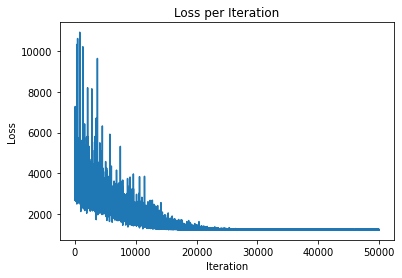

In [42]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);
plt.title('Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [43]:
# samples from the posterior
posterior = approximation.sample(5000)

In [44]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_val.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - yn_val))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - yn_val) / yn_val)))

MAE =  3659306.4123096336
MAPE =  1.0144321875846805


We can see from the results of our full model, the Mean Absolute Percentage Error is around 27%

In [45]:
#Predict the house prices on our final test data

# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_test = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]

In [46]:
#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_test})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df.to_csv(Path + 'BayesianRegressionPredictions/' + f"House Price Prediction_Bayesian_FullModel_{date}.csv", index=False)

### Gaussian Mixture Model 
We need to determine the optimum number of clusters to use

### Determine the number of clusters - K-Means

We will use K-Means clustering to partition all our data points into k clusters. We will try for multiple different clusters, and calculate the inertia for each cluster, which is the sum of the distances of the samples to their closest cluster center. 

We are looking for an 'elbow' in the graph to determine the most appropriate k value. From the plot below, it appears 4 or 5 clusters are the optimum, I will choose 4 as an extra cluster might give a slight improvement in the model without overfitting.

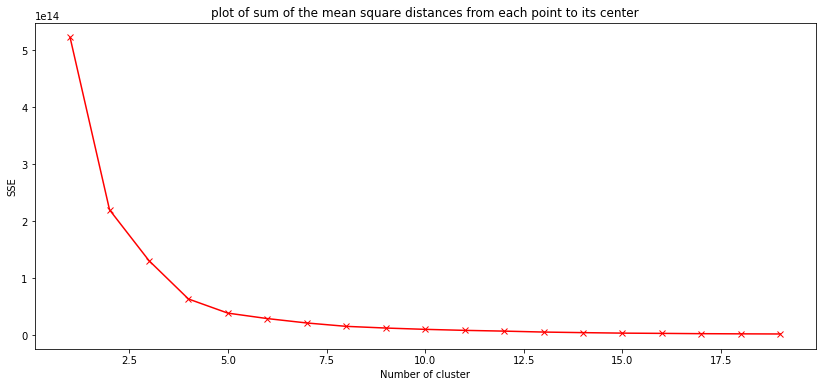

In [47]:
data = df_subset_train

sse = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(init='k-means++', n_clusters=k, max_iter=300).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure(figsize=(14, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'rx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("plot of sum of the mean square distances from each point to its center")
plt.show()

In [48]:
from sklearn import metrics

silhouette_coefficients = []
   
# Start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=20, max_iter=500, random_state=10).fit(Xn_train)
    score = metrics.silhouette_score(Xn_train, clustered_data_sklearn.labels_)
    silhouette_coefficients.append(score)

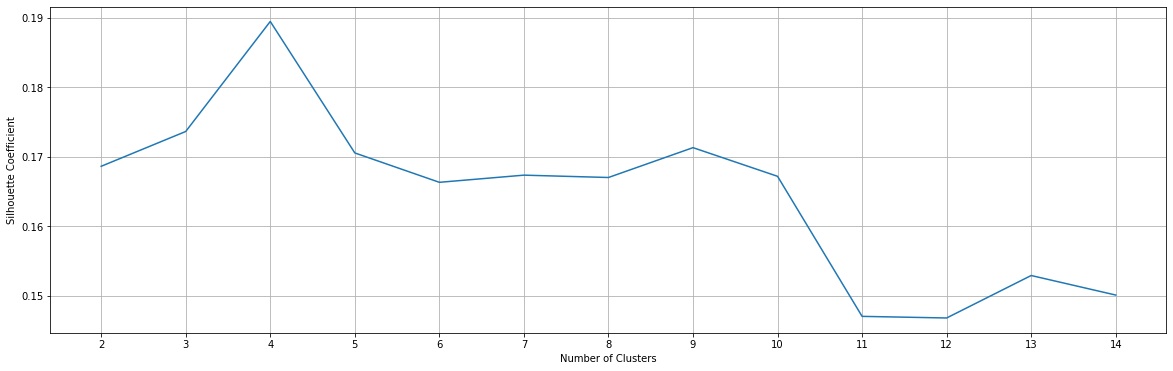

In [49]:
plt.figure(figsize=(20,6))
plt.plot(range(2,15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xticks()
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.show()

From the plot above, the elbow seems to occur at 4 clusters, so we will use that

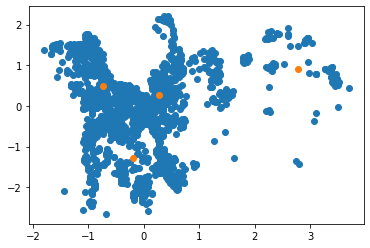

In [50]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# clustering by features latitude and longitude
ind=[2,3]
X_ind = np.vstack([Xn_train[:,ind],Xn_val[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)

# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


### Generating Clusters of Data

In [51]:
# split the data for train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))


{0: 513, 1: 310, 2: 402, 3: 83}

In [52]:
# split the data for validation clusters
clusters_test = gmm.predict(Xn_val[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 129, 1: 96, 2: 89, 3: 13}

In [53]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_val[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [54]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_val[clusters_test==1,:]

ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [55]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_val[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)


In [56]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_val[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model
Train a different model on each of the clusters individually

In [57]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(5000)

Finished [100%]: Average Loss = 560.7


In [58]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 343.11


In [59]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 410.51


In [60]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 142.13


## Simulations
We review how the predicted values from the model compare with the true values using posterior predictive checks

In [61]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred



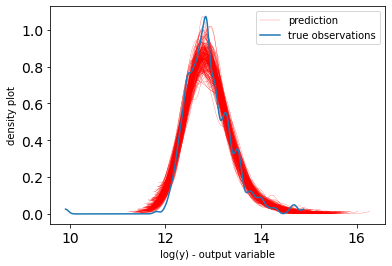

In [62]:
#Simulation CLuster 0
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

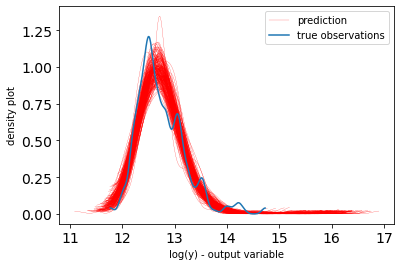

In [63]:
#Simulation Cluster 1
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

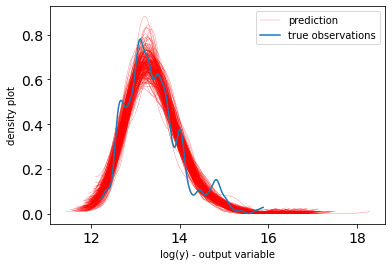

In [64]:
#Simulation Cluster 2
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

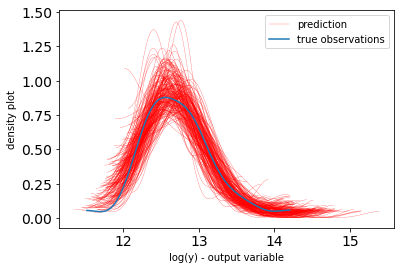

In [65]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

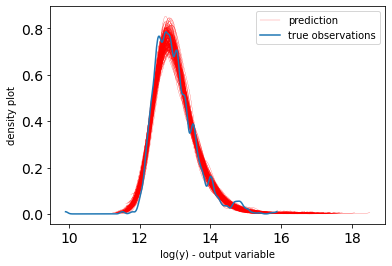

In [66]:
#Simulation on all clusters combined
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Evaluate Performance on Validation Dataset

In [67]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", \nMAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0])))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1])))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2])))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]))))
print("MAPE = ",(np.mean(abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3])))

# joint
joint=np.hstack([abs(y_pred_BLR0 - yn_val[clusters_test==0]),
                 abs(y_pred_BLR1 - yn_val[clusters_test==1]),
                 abs(y_pred_BLR2 - yn_val[clusters_test==2]),
                 abs(y_pred_BLR3 - yn_val[clusters_test==3])])

joint_mape = np.mean(np.hstack([
                        abs(y_pred_BLR0 - yn_val[clusters_test==0]) /yn_val[clusters_test==0],
                        abs(y_pred_BLR1 - yn_val[clusters_test==1]) /yn_val[clusters_test==1],
                        abs(y_pred_BLR2 - yn_val[clusters_test==2]) /yn_val[clusters_test==2],
                        abs(y_pred_BLR3 - yn_val[clusters_test==3]) /yn_val[clusters_test==3]
                       ]))

# MAE
print("Overall MAE=",np.mean(joint))
print("Overall MAPE = ", joint_mape)

Size Cluster0 129 , 
MAE Cluster0= 120613.9158250046
MAPE =  0.22571719947431157
Size Cluster1 96 , MAE Cluster1= 72837.84065463075
MAPE =  0.1980218721452229
Size Cluster2 89 , MAE Cluster2= 8627837.571200645
MAPE =  2.0749737422285293
Size Cluster3 13 , MAE Cluster3= 34330.72826137603
MAPE =  0.10980266366629357
Overall MAE= 2418579.422472555
Overall MAPE =  0.7162927099208822


We can see approximately 3-4% improvement for the piecewise regression models vs the model on the full dataset

We now need to predict the Final Test Values

In [68]:
#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]

#Store the index of the cluster data
idx_cluster0 = Xtestn0_final[:,0]
#Remove the index column for prediction
Xtestn0_final = Xtestn0_final[:,1:]


In [69]:
#We now need to predict the Final Test Values

#Add the index column back onto Test data
Xn_test_with_index = np.hstack((dftest.Index[:, None],Xn_test))

#Create clusters for our test data
clusters_final_test = gmm.predict(Xn_test_with_index[:,ind])

#Get cluster with the index value included
Xtestn0_final = Xn_test_with_index[clusters_final_test==0,:]
Xtestn1_final = Xn_test_with_index[clusters_final_test==1,:]
Xtestn2_final = Xn_test_with_index[clusters_final_test==2,:]
Xtestn3_final = Xn_test_with_index[clusters_final_test==3,:]

#Store the indexes for cluster
idx_cluster0 = Xtestn0_final[:,0]
idx_cluster1 = Xtestn1_final[:,0]
idx_cluster2 = Xtestn2_final[:,0]
idx_cluster3 = Xtestn3_final[:,0]

#Remove the index from the cluster again for prediction
Xtestn0_final = Xtestn0_final[:,1:]
Xtestn1_final = Xtestn1_final[:,1:]
Xtestn2_final = Xtestn2_final[:,1:]
Xtestn3_final = Xtestn3_final[:,1:]


y_pred_test0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0_final.T)))
y_pred_test1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1_final.T)))
y_pred_test2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2_final.T)))
y_pred_test3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3_final.T)))

In [70]:
#JOin the CLuster indexes with their predicted value to ensure there is no mix up
pred_0 = np.hstack((idx_cluster0[:, None], y_pred_test0[:, None]))
pred_1 = np.hstack((idx_cluster1[:, None], y_pred_test1[:, None]))
pred_2 = np.hstack((idx_cluster2[:, None], y_pred_test2[:, None]))
pred_3 = np.hstack((idx_cluster3[:, None], y_pred_test3[:, None]))

#Combine all predicted results together
final_prediction_piecewise = np.vstack((pred_0, pred_1, pred_2, pred_3))

#Sort the final predictions on index again, just to have final index in order
final_prediction_piecewise = final_prediction_piecewise[final_prediction_piecewise[:, 0].argsort()]

#We create an output file of the predicted house prices for the test dataset along with their index
df = pd.DataFrame({"Index" :  final_prediction_piecewise[:,0] , "Price" : final_prediction_piecewise[:,1]})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BayesianPiecewisePredictions/' + f"House Price Prediction_Bayesian_Piecewise_{date}.csv", index=False)

In [71]:
df

,Index,Price
0,1639,382313.064771
1,1640,530237.530649
2,1641,470365.285821
3,1642,746791.165718
4,1643,435431.833740
...,...,...
697,2336,389028.360741
698,2337,525363.688555
699,2338,550162.985248
700,2339,525922.692610


# 6.0 BAYESIAN NN

We will use a Bayesian Neural Network model to predict our house prices in this section. A Neural network has an input layer, one or more hidden layers, and an output layer. We use an activation function to calculate the outputs of each layer based on inputs and weights. 

Below, our inputs are our training dataset fetures including the aditional NLP features added. We create weight vectors between our input and hidden layer, and another weight vector between our hiden and output layers. We are using the hyperbolic tangent function (tanh) as our activation function. Our output is a distrubution for our predicted house prices.

Reference Document:

https://pymc3-testing.readthedocs.io/en/rtd-docs/notebooks/bayesian_neural_network_opvi-advi.html

In [72]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((Xn_train.shape[0],1)), Xn_train])
floatX = theano.config.floatX

l = 25
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', yn_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [73]:
# we can do instead an approximated inference
param3 = 10000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.sgd # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.1    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Finished [100%]: Average Loss = 1,360.5


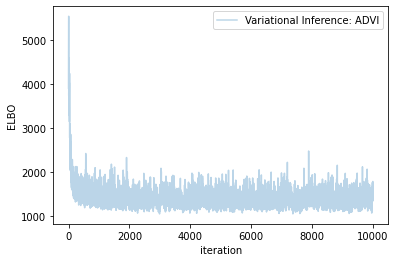

In [74]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [75]:
# draw samples from variational posterior
D = 300
posterior = approx.sample(draws=D)

###Evaluate model on validation data set

In [76]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_val.shape[0],1)), Xn_val])

y_val_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_val_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_val_pred = np.array(y_val_pred).mean(axis=0)

In [77]:
#We need to do the inverse transformation and scaling that was carried out on the y values at the start
y_val_pred_final = np.exp(yscaler.inverse_transform(y_val_pred))

In [78]:
print("MAE = ",(np.mean(abs(y_val_pred_final - yn_val))))
print("MAPE = ",(np.mean(abs(y_val_pred_final - yn_val) / yn_val)))

MAE =  151108.08667634684
MAPE =  0.21659690318307073


We can see from the MAPE, the Bayesian Neural Network has improved performance by 2-3% on the Piecewise regression model above

###Predict new y values for test data

In [79]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((Xn_test.shape[0],1)), Xn_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred).mean(axis=0)

In [80]:
y_pred_final = np.exp(yscaler.inverse_transform(y_pred))

In [81]:
#We create an output file of the predicted house prices for the test dataset along with their index. This was the file uploaded to kaggle.
df = pd.DataFrame({"Index" :  dftest.iloc[:,0].values , "Price" : y_pred_final})
date = datetime.now().strftime("%Y_%m_%d-%I:%M:%S_%p")
df['Index'] = df['Index'].astype(int)
df.set_index('Index')
df.to_csv(Path + 'BNN/' + f"House Price Prediction_{date}.csv", index=False)

# SUMMARY

Our goal in this Etivity was to build multiple supervised machine learning models to predict house prices, incorporating NLP to determine new features to add to our existing ones supplied in the dataset. In section 3 we carried out some Exploratory Data Analysis (EDA) to visualise and interprit the data supplied. We performed some pre-processing steps on the data to ensure some irrelevant columns were removed, and also outliers in our dataset were removed. We then used a heatmap to determine the relationship between the price and the input variables.

In section 4, we used NLP to introduce new features into our model. We started by performing some cleansing of our "Features" column, before calculating the TF-IDF scores for the different words used. We selected three new features to add to our model based on the NLP.

In section 5, we trained a baseline Bayesian regression model on our full dataset, and calculated the MAE and MAPE of the resulting model. We then used a Gaussain Mixture Model to determine the optimum number of clusters to use for our piecewise regression, based on a plot of latitude vs longitude. We also used K-Means clustering and the elbow method to try another approach to determine the number of clusters to use, and between both approaches I settled on four clusters as the optimum.

Having decided on the number of clusters, we split out the training and validation datasets into their respective clusters. Each of the clusters contained a reasonable number of samples. We proceed to train an individual model on each of the five clusters using a Bayesian approach. We compare the predicted values vs the true values for each of our training clusters. We evaluate our model on the validation dataset, comparing the predicted values from the model with the true values for the house prices. Following is a comparison of the results from the full model vs piecewise regression approach:

**Full Model:**

MAE =  171366.69424216385

MAPE =  0.25240352567387386

**Piecewise model:**

Overall MAE= 164448.26715735308

Overall MAPE =  0.2120414631424098

From the results we can see that we got an approximately 3-4% improvement on the predictions when we used the piecewise regression approach. We would expect to see an improvement in the results with the piecewise regression model, as each cluster is trained individually using linear regression and we can fit the data more accurately.

Finally, in section 6 we trained a Bayesian Neural Network on the data, using an input layer, a hidden layer and an output layer in the network. We draw samples from the posterior, and use these to predict the house prices on our validation dataset. The following are the results from the BNN:

**BNN model:**

MAE =  151283.54814633154

MAPE =  0.20843973298555726

Again, we can see an improvement from other models using the BNN. The best MAPE achieved over multiple runs was approximately 17% MAPE. We then used the posterior to predict the house prices from our test dataset, and uploaded these to Kaggle.

It may be possible to get better results by doing some further pre-processing of the data to ensure that the features used had a normal distribution across the data. We could also spend more time cleansing the data and possibly utilising more of the features when predicting the target variable. 

Given more time we could have explored further the results of the NLP to determine the best features to use in our new model. I choose three new features for garden, parking and heating as these three words appeared in the top 100 list from the NLP process, but we could have used XG-Boost for example on the top 100 list to determine which ones had the best correlation with price, and use these. There may also be scope for using a lot more of the features, and using feature reduction techniques to combine features. 

Certainly, the BNN seems to give the best overall results from the different models, as would be expected. It would have been nice to explore adding more hidden layers to the model to see if this would have improved the overall performance. 



##References

En.wikipedia.org. 2021. Segmented regression - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Segmented_regression>

Kappel, S., 2017. Piecewise regression: when one line simply isn’t enough. [online] Piecewise regression: when one line simply isn’t enough. Available at: <https://www.datadoghq.com/blog/engineering/piecewise-regression/>.

Bock, T., 2021. What are Residuals?. [online] Displayr. Available at: <https://www.displayr.com/learn-what-are-residuals/>.

Jospin, L.V. et al. (2021) ‘Hands-on Bayesian Neural Networks -- a Tutorial for Deep Learning Users’, arXiv:2007.06823 [cs, stat] [Preprint]. Available at: http://arxiv.org/abs/2007.06823.


Ahamed, S., 2019. Bayesian Neural network. [online] Medium. Available at: <https://towardsdatascience.com/bayesian-neural-network-7041dd09f2cc>

Medium. 2020. NLP with Real Estate Advertisements. [online] Available at: <https://becominghuman.ai/nlp-with-real-estate-advertisements-part-2-f944e566644b> [Accessed 16 October 2021].

Solanki, G., 2020. Gaussian Mixture Model | What is Gaussian Mixture Model?. [online] GreatLearning Blog: Free Resources what Matters to shape your Career!. Available at: <https://www.mygreatlearning.com/blog/gaussian-mixture-model/>.


Scikit-yb.org. n.d. Elbow Method — Yellowbrick v1.3.post1 documentation. [online] Available at: <https://www.scikit-yb.org/en/latest/api/cluster/elbow.html> [Accessed 2 October 2021].